In [3]:
words = open('/notebooks/first_name.txt', 'r').read().splitlines()

In [4]:
words = [w.lower() for w in words]
len(words), words[:10]

(2195,
 ['aachal',
  'aadharsh',
  'aadhavi',
  'aadhira',
  'aadidev',
  'aadil',
  'aadita',
  'aaditya',
  'aadiv',
  'aadrik'])

In [7]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

14

In [5]:
import torch

In [6]:
N = torch.zeros((27,27), dtype = torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [8]:
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [9]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

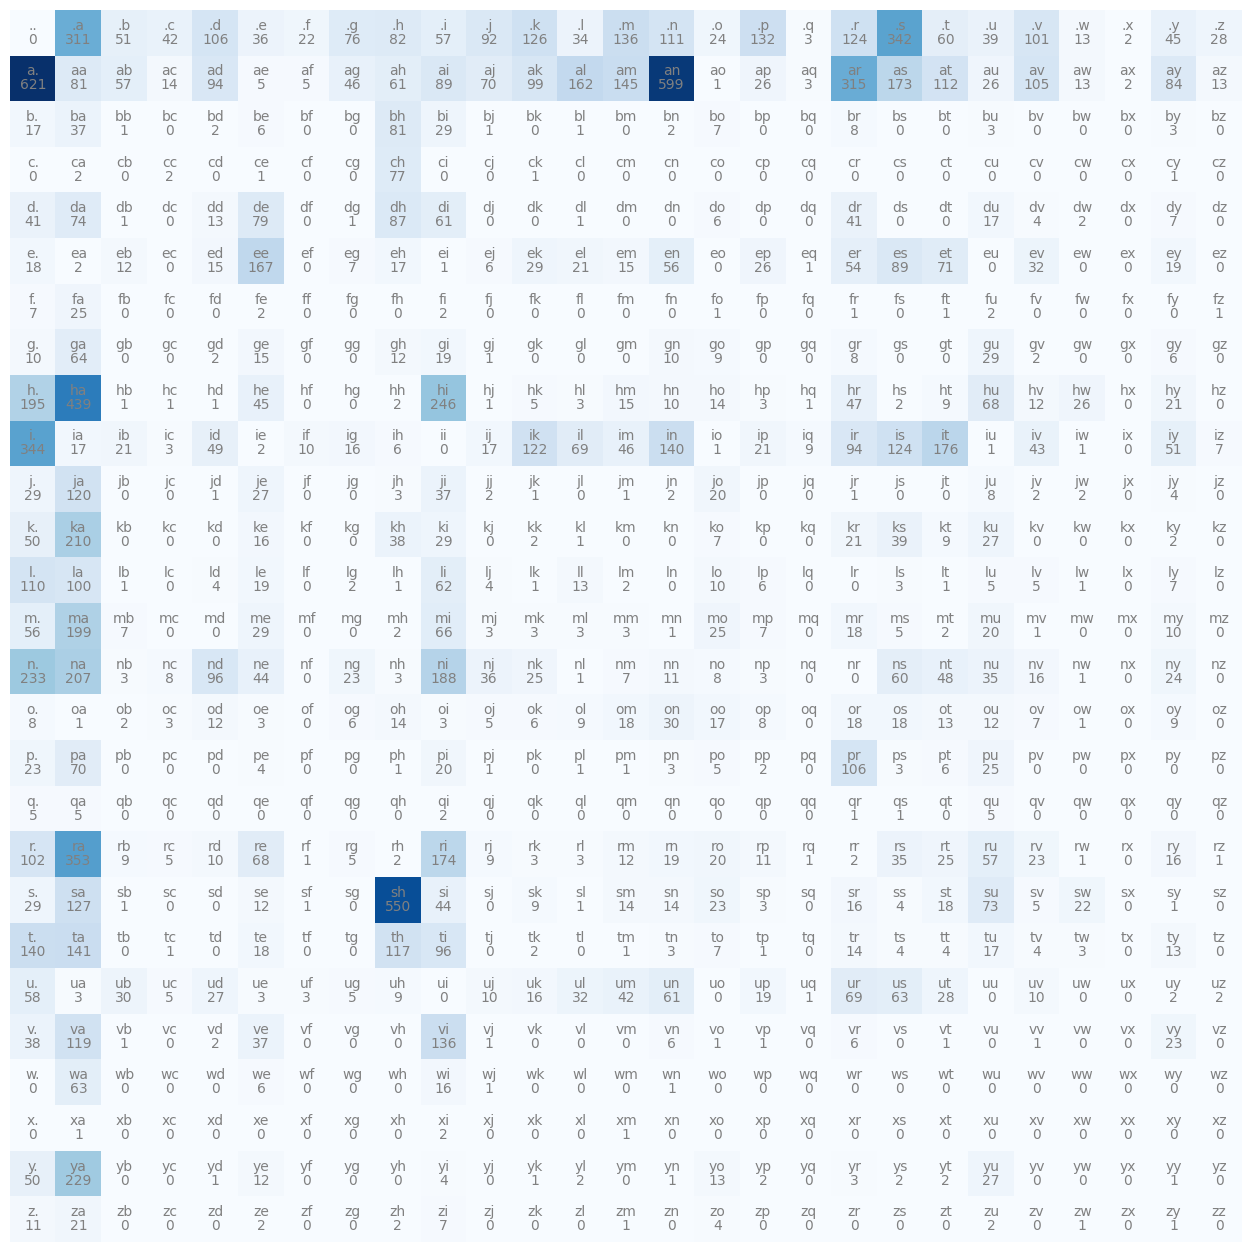

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [11]:
N[0]

tensor([  0, 311,  51,  42, 106,  36,  22,  76,  82,  57,  92, 126,  34, 136,
        111,  24, 132,   3, 124, 342,  60,  39, 101,  13,   2,  45,  28],
       dtype=torch.int32)

In [12]:
P = (N+1).float()
P = P / P.sum(1, keepdim=True)
P

tensor([[4.5005e-04, 1.4041e-01, 2.3402e-02, 1.9352e-02, 4.8155e-02, 1.6652e-02,
         1.0351e-02, 3.4653e-02, 3.7354e-02, 2.6103e-02, 4.1854e-02, 5.7156e-02,
         1.5752e-02, 6.1656e-02, 5.0405e-02, 1.1251e-02, 5.9856e-02, 1.8002e-03,
         5.6256e-02, 1.5437e-01, 2.7453e-02, 1.8002e-02, 4.5905e-02, 6.3006e-03,
         1.3501e-03, 2.0702e-02, 1.3051e-02],
        [2.0407e-01, 2.6903e-02, 1.9029e-02, 4.9213e-03, 3.1168e-02, 1.9685e-03,
         1.9685e-03, 1.5420e-02, 2.0341e-02, 2.9528e-02, 2.3294e-02, 3.2808e-02,
         5.3478e-02, 4.7900e-02, 1.9685e-01, 6.5617e-04, 8.8583e-03, 1.3123e-03,
         1.0367e-01, 5.7087e-02, 3.7073e-02, 8.8583e-03, 3.4777e-02, 4.5932e-03,
         9.8425e-04, 2.7887e-02, 4.5932e-03],
        [8.0000e-02, 1.6889e-01, 8.8889e-03, 4.4444e-03, 1.3333e-02, 3.1111e-02,
         4.4444e-03, 4.4444e-03, 3.6444e-01, 1.3333e-01, 8.8889e-03, 4.4444e-03,
         8.8889e-03, 4.4444e-03, 1.3333e-02, 3.5556e-02, 4.4444e-03, 4.4444e-03,
         4.0000e-

In [16]:
g = torch.Generator().manual_seed(2147483647 + 3)

for i in range(10):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

hai.
mjnimalinuha.
shapmaraa.
mi.
munivi.
z.
din.
anshwan.
det.
aimishit.


$
\begin{aligned}
&{\bf P}(word) = {\bf P}(ch_1|ch_0)\times{\bf P}(ch_2|ch_1) \dots = \prod_{i} {\bf P}(ch_i|ch_{i-1}) \\
&\log({\bf P}(word)) = \sum_{i} {\bf P}(ch_{i}|ch_{i-1})) \quad \text{(log likelihood)}
\end{aligned}
$

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-37505.1953)
nll=tensor(37505.1953)
2.289414882659912


In [23]:
xs, ys = [], []

for w in ["abcxyz"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    # print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [24]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1.]])

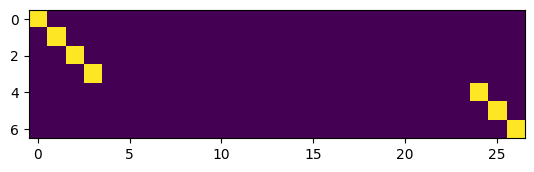

In [25]:
plt.imshow(xenc)

In [26]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [ ]:
print(loss.item())

3.910465955734253


In [ ]:
# backward pass
W.grad = None # set to zero the gradient
# loss.requires_grad = True
loss.backward()

In [ ]:
W.data += -0.1*W.grad

# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  16382


In [ ]:
#gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.1*(W**2).mean()
  # print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

print(loss.item())
print(W.exp().round())

2.4213695526123047
tensor([[ 0.,  6.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  3.,
          2.,  1.,  3.,  0.,  2.,  7.,  1.,  1.,  2.,  0.,  0.,  1.,  1.],
        [10.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  3.,  2.,
         10.,  0.,  0.,  0.,  5.,  3.,  2.,  0.,  2.,  0.,  0.,  1.,  0.],
        [ 3.,  7.,  1.,  1.,  1.,  1.,  1.,  1., 17.,  5.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 49.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  7.,  0.,  0.,  1.,  8.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  4.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  0.],
        [ 1.,  0.,  1.,  0.,  1., 12.,  0.,  1.,  1.,  0.,  1.,  2.,  1.,  1.,
          4.,  0.,  2.,  0.,  4.,  6.,  5.,  0.,  2.,  0.,  0.,  1.,  0.],
        [ 3., 13.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

In [ ]:
  # finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483646+7)

for i in range(10):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

arifanja.
bijali.
kvra.
pikshasha.
n.
par.
shdeetaled.
al.
dal.
nsa.
